In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
G=nx.Graph()

In [3]:
with open('user_data.json','r') as file:
    user_data = json.load(file)

In [4]:
with open('rt_data.json','r') as file:
    rt_data = json.load(file)

In [5]:
for node in user_data:
    G.add_node(node)

In [6]:
for node in rt_data:
    G.add_node(node)

In [7]:
print(len(rt_data.keys()))

3005


In [8]:
ctr=0
for node in rt_data:
    left = node
    for right in rt_data[node]:
        ctr += 1
        G.add_edge(left, str(right), weight=1)

In [9]:
for node in user_data:
    left = node
    for right in user_data[node]:
        ctr += 1
        G.add_edge(left, str(right), weight=1)

In [10]:
print(ctr)

5716


/home/shivang/.conda/envs/tf_gpu/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


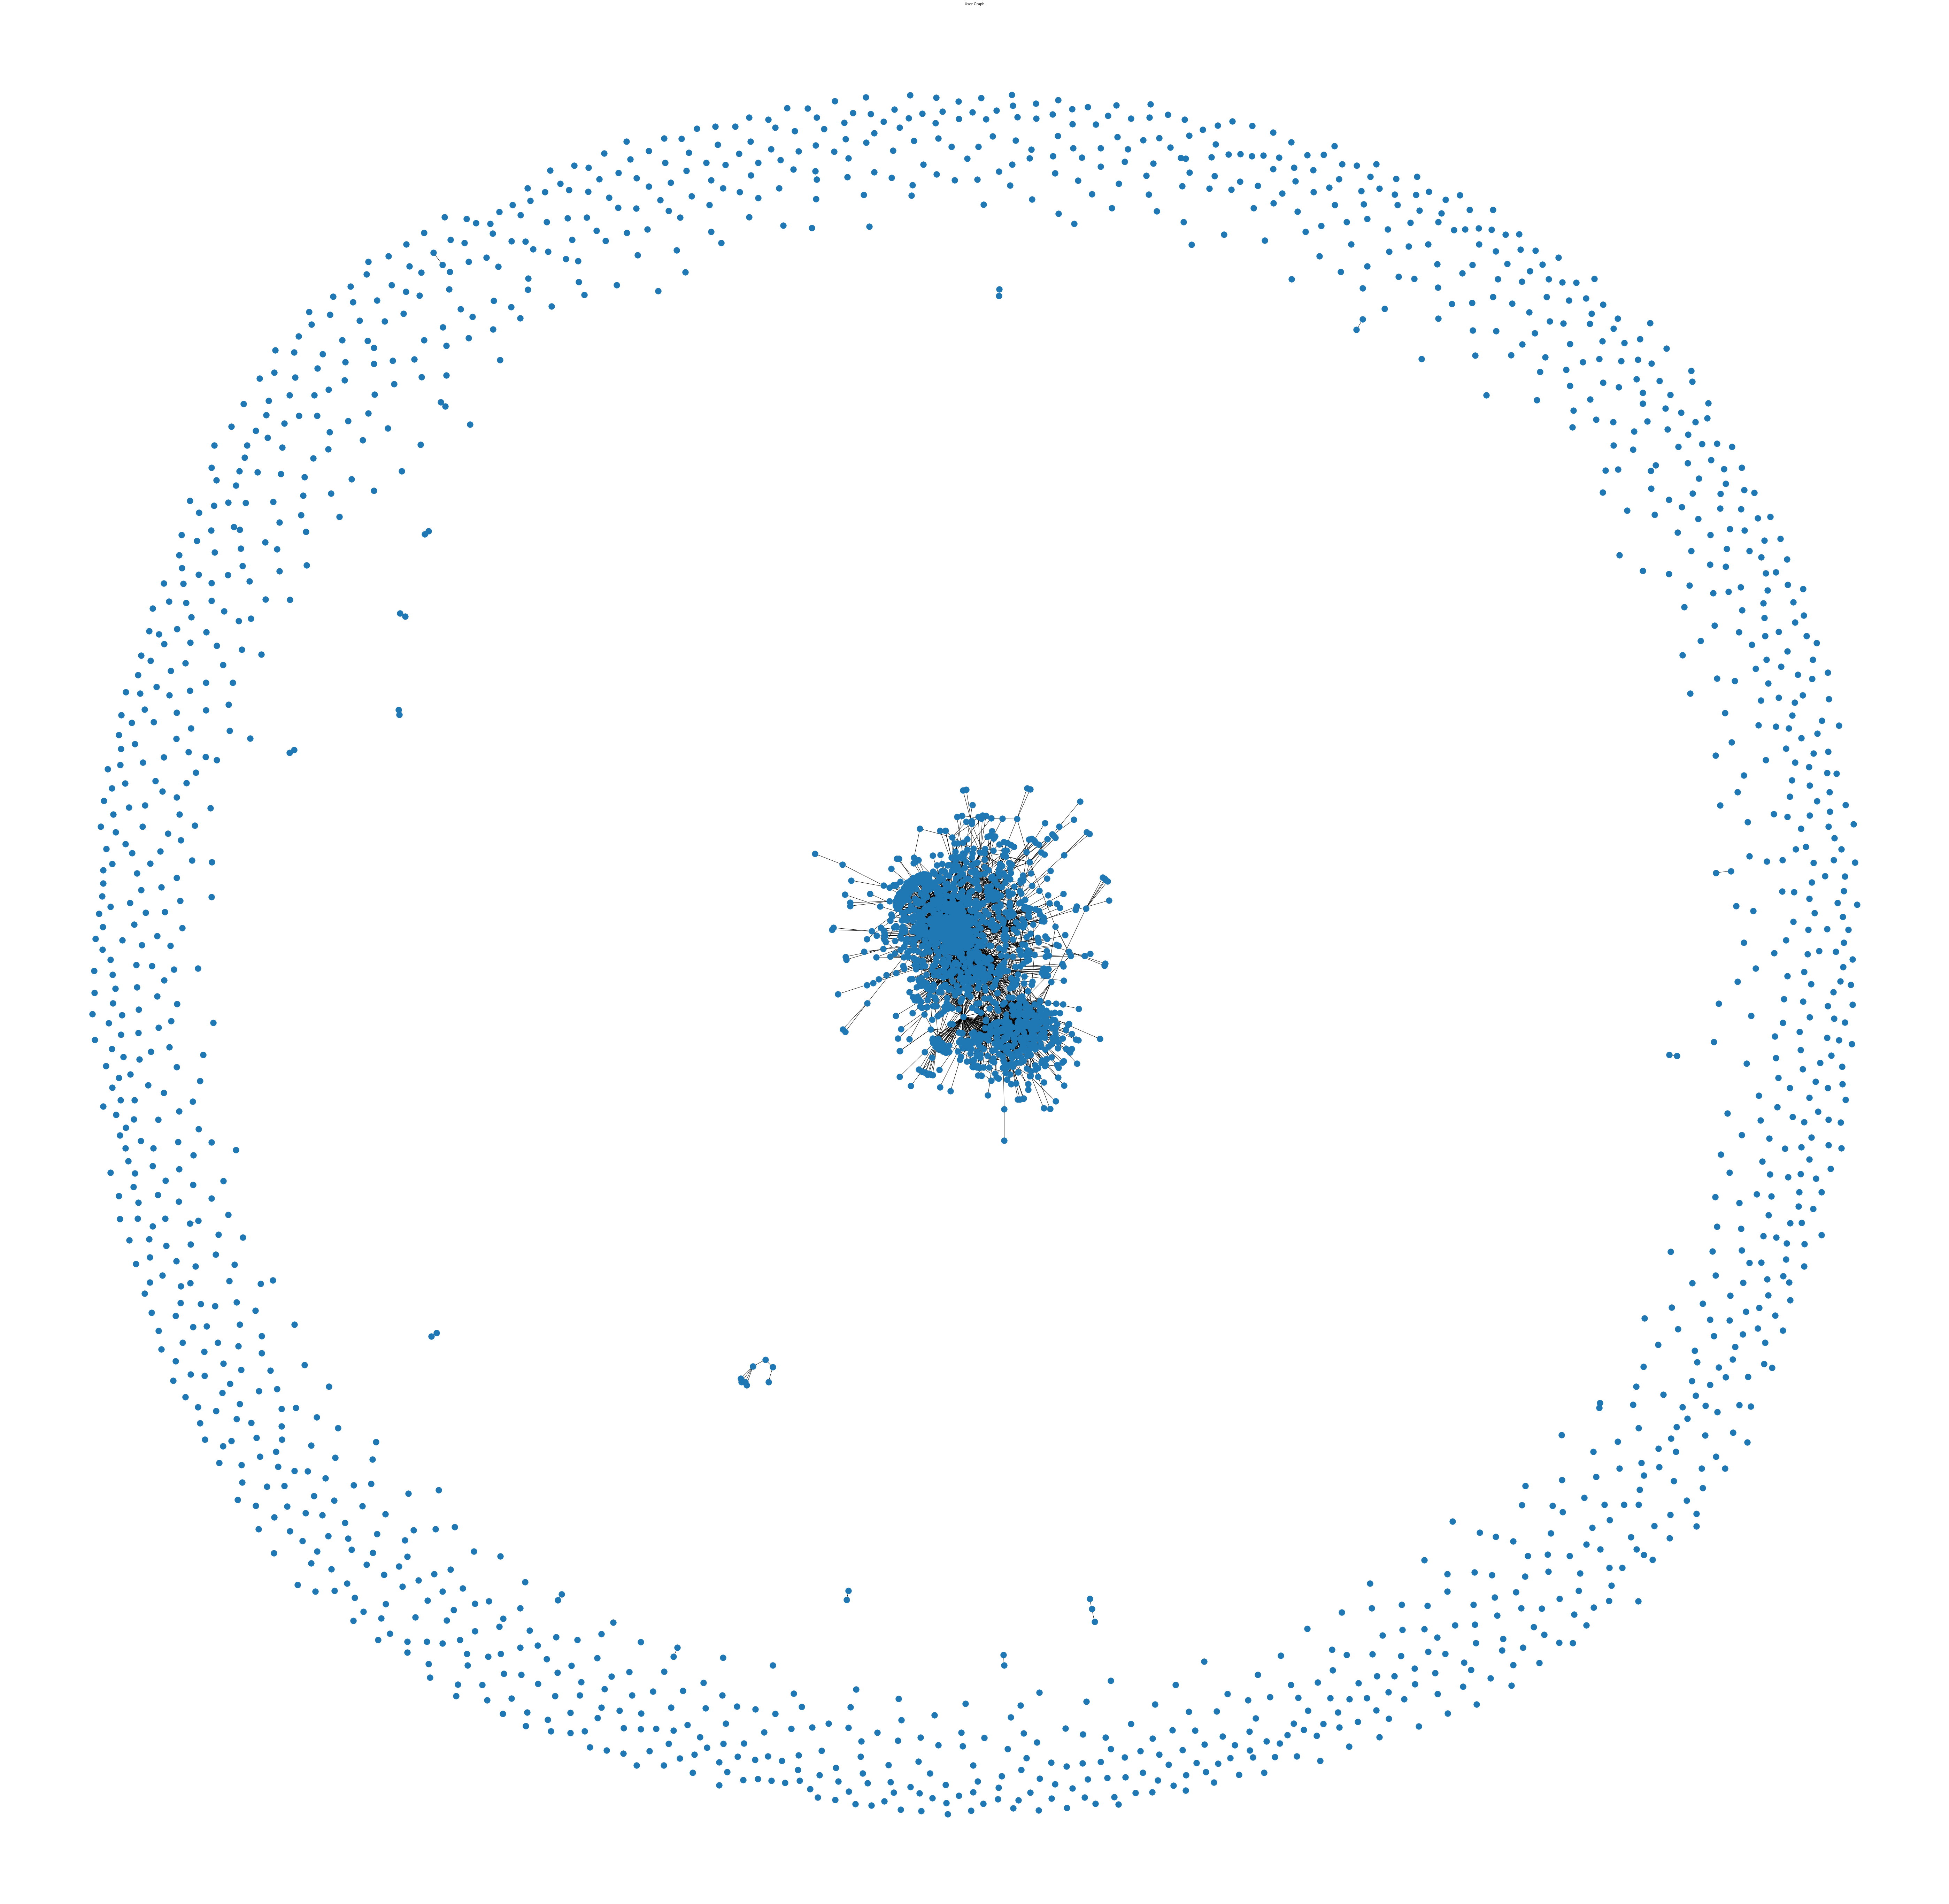

In [11]:
fig = plt.figure(figsize=(100,100))
ax = plt.subplot(111)
ax.set_title('User Graph', fontsize=10)
nx.draw(G)
plt.savefig("user_graph.png")
plt.show(block=False)
# nx.draw_graphviz(G)

In [12]:
print(nx.classes.function.info(G))

Name: 
Type: Graph
Number of nodes: 3005
Number of edges: 4448
Average degree:   2.9604


In [13]:
degs = nx.classes.function.degree_histogram(G)

(array([19.,  3.,  5.,  2.,  0.,  0.,  2.,  1.,  1.,  1.,  2.,  2.,  0.,
         0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 14 Patch objects>)

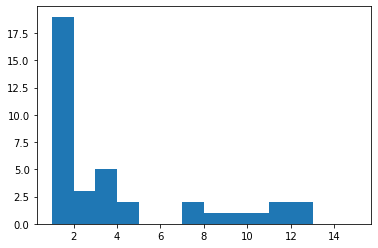

In [14]:
plt.hist(degs, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [15]:
print(nx.classes.function.density(G))

0.0009854857970847523


In [16]:
nx.classes.function.restricted_view(G)

TypeError: restricted_view() missing 2 required positional arguments: 'nodes' and 'edges'

In [18]:
paths = nx.johnson (G, weight='weight')

In [19]:
print(paths)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
print(type(paths))

<class 'dict'>


In [22]:
len(paths)

3005

In [23]:
paths.keys()

dict_keys(['1615850780', '903075788756590593', '881096476616781825', '3268145264', '763212669524467712', '896721858439118848', '119401534', '876886531406831616', '712287612938092544', '1452232537', '928333319946637312', '143763417', '2566436641', '607225379', '523595918', '870604225981677568', '924071851365666817', '926030721994461184', '355108318', '873872389708275712', '908298131644837888', '281120711', '3156832884', '39315658', '771658655858954240', '903644949157224449', '1875827437', '899356883252690944', '133205520', '2933104884', '926698294591361025', '867069682074955776', '3689059701', '831760398453964801', '901820013350313985', '786952231702507520', '1157282526', '2912618503', '857655488984600576', '1286373631', '3243223542', '845519146783817728', '927136537384402948', '3322024903', '178271634', '814413472704372737', '786454571363164164', '915586580781293569', '915317039186690048', '471899070', '925055284816494592', '242651047', '3141590402', '2878611385', '213708682', '3171728

In [24]:
paths['4025377332']

{'4025377332': ['4025377332'],
 '782495227500191745': ['4025377332', '782495227500191745'],
 '3229545542': ['4025377332', '3229545542'],
 '523595918': ['4025377332', '782495227500191745', '523595918'],
 '121219467': ['4025377332', '782495227500191745', '121219467'],
 '200006266': ['4025377332', '782495227500191745', '200006266'],
 '789169594405576704': ['4025377332',
  '782495227500191745',
  '789169594405576704'],
 '4727605010': ['4025377332', '782495227500191745', '4727605010'],
 '1459738746': ['4025377332', '3229545542', '1459738746'],
 '1467371760': ['4025377332', '3229545542', '1467371760'],
 '915569119147180033': ['4025377332', '3229545542', '915569119147180033'],
 '159831364': ['4025377332', '3229545542', '159831364'],
 '712287612938092544': ['4025377332',
  '782495227500191745',
  '523595918',
  '712287612938092544'],
 '3402398320': ['4025377332', '782495227500191745', '523595918', '3402398320'],
 '2732668863': ['4025377332', '782495227500191745', '523595918', '2732668863'],
 '

In [26]:
maxlen = 0
for node1 in paths:
    for node2 in paths[node1]:
        maxlen = max(maxlen, len(paths[node1][node2]))

In [27]:
maxlen

11

In [28]:
graphs = list(nx.connected_component_subgraphs(G))

In [29]:
graphs

 ...]

In [30]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [33]:
len(Gc.nodes)

1481